In [1]:
import pandas as pd

In [61]:
is_collapsed = True
COLLAPSE = "Collapsed" if is_collapsed else "Uncollapsed"
df = pd.read_csv(f"../results/aime_deepseek_qwen_14b_replay_base_sum_4iter/aime_deepseek_qwen_14b_replay_base_sum_4iter_20250502_195657/results_reasoning_summaries_annotated.behaviour_stats{'.uncollapsed' if not is_collapsed else ''}.csv")


In [44]:
df.head()

,problem,iter,trace_len,sum_len,compression,coverage,order_sim,trace_labels,summary_labels,trace_initializing,...,trace_adding-knowledge,trace_example-testing,trace_uncertainty-estimation,trace_backtracking,sum_initializing,sum_deduction,sum_adding-knowledge,sum_example-testing,sum_uncertainty-estimation,sum_backtracking
0,0,0,59,14,0.237288,0.666667,0.237288,"['initializing', 'deduction', 'adding-knowledg...","['initializing', 'deduction', 'adding-knowledg...",5,...,8,2,4,2,1,10,2,1,0,0
1,0,1,23,11,0.478261,1.000000,0.434783,"['initializing', 'deduction', 'deduction', 'de...","['initializing', 'deduction', 'deduction', 'de...",2,...,0,1,2,0,1,8,0,1,1,0
2,0,2,65,12,0.184615,1.000000,0.092308,"['initializing', 'adding-knowledge', 'deductio...","['initializing', 'deduction', 'adding-knowledg...",3,...,5,0,0,0,1,3,2,4,1,1
3,0,3,26,8,0.307692,0.600000,0.307692,"['initializing', 'adding-knowledge', 'deductio...","['initializing', 'deduction', 'deduction', 'de...",4,...,2,2,1,0,1,6,1,0,0,0
4,1,0,42,12,0.285714,0.833333,0.285714,"['initializing', 'deduction', 'adding-knowledg...","['initializing', 'deduction', 'deduction', 'de...",2,...,4,10,3,2,1,7,1,2,1,0


In [45]:
iter0_df = df[df["iter"] == 0]
print(len(iter0_df))
iter0_df.head()

60


,problem,iter,trace_len,sum_len,compression,coverage,order_sim,trace_labels,summary_labels,trace_initializing,...,trace_adding-knowledge,trace_example-testing,trace_uncertainty-estimation,trace_backtracking,sum_initializing,sum_deduction,sum_adding-knowledge,sum_example-testing,sum_uncertainty-estimation,sum_backtracking
0,0,0,59,14,0.237288,0.666667,0.237288,"['initializing', 'deduction', 'adding-knowledg...","['initializing', 'deduction', 'adding-knowledg...",5,...,8,2,4,2,1,10,2,1,0,0
4,1,0,42,12,0.285714,0.833333,0.285714,"['initializing', 'deduction', 'adding-knowledg...","['initializing', 'deduction', 'deduction', 'de...",2,...,4,10,3,2,1,7,1,2,1,0
8,10,0,262,9,0.034351,0.833333,0.034351,"['initializing', 'deduction', 'adding-knowledg...","['initializing', 'adding-knowledge', 'deductio...",13,...,23,28,49,21,1,5,1,1,0,1
12,11,0,194,11,0.056701,0.500000,0.056701,"['initializing', 'initializing', 'adding-knowl...","['initializing', 'adding-knowledge', 'deductio...",11,...,13,3,21,5,1,9,1,0,0,0
16,12,0,456,11,0.024123,0.666667,0.024123,"['initializing', 'deduction', 'example-testing...","['initializing', 'deduction', 'adding-knowledg...",18,...,25,48,53,34,1,7,1,2,0,0


In [46]:
iter0_df['trace_labels'][0]

"['initializing', 'deduction', 'adding-knowledge', 'deduction', 'adding-knowledge', 'deduction', 'deduction', 'initializing', 'adding-knowledge', 'deduction', 'deduction', 'deduction', 'example-testing', 'deduction', 'deduction', 'initializing', 'deduction', 'deduction', 'deduction', 'adding-knowledge', 'deduction', 'deduction', 'deduction', 'deduction', 'deduction', 'uncertainty-estimation', 'deduction', 'adding-knowledge', 'deduction', 'initializing', 'adding-knowledge', 'adding-knowledge', 'deduction', 'deduction', 'deduction', 'deduction', 'uncertainty-estimation', 'backtracking', 'deduction', 'deduction', 'uncertainty-estimation', 'example-testing', 'deduction', 'backtracking', 'deduction', 'deduction', 'deduction', 'deduction', 'deduction', 'uncertainty-estimation', 'initializing', 'deduction', 'deduction', 'deduction', 'deduction', 'deduction', 'adding-knowledge', 'deduction', 'deduction']"

In [50]:
iter0_df['trace_labels'] = iter0_df['trace_labels'].apply(eval)

/var/folders/8y/j9pbnmqj2t1bn5kv9ps9lg680000gn/T/ipykernel_17315/519607530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iter0_df['trace_labels'] = iter0_df['trace_labels'].apply(eval)


In [52]:
len(iter0_df['trace_labels'][0])

59

In [13]:
r0 = iter0_df.iloc[0].to_dict()
r0

{'problem': '0',
 'iter': 0,
 'trace_len': 35,
 'sum_len': 8,
 'compression': 0.2285714285714285,
 'coverage': 0.6666666666666666,
 'order_sim': 0.2285714285714285,
 'trace_labels': "['initializing', 'deduction', 'adding-knowledge', 'deduction', 'adding-knowledge', 'deduction', 'initializing', 'adding-knowledge', 'deduction', 'example-testing', 'deduction', 'initializing', 'deduction', 'adding-knowledge', 'deduction', 'uncertainty-estimation', 'deduction', 'adding-knowledge', 'deduction', 'initializing', 'adding-knowledge', 'deduction', 'uncertainty-estimation', 'backtracking', 'deduction', 'uncertainty-estimation', 'example-testing', 'deduction', 'backtracking', 'deduction', 'uncertainty-estimation', 'initializing', 'deduction', 'adding-knowledge', 'deduction']",
 'summary_labels': "['initializing', 'deduction', 'adding-knowledge', 'deduction', 'adding-knowledge', 'deduction', 'example-testing', 'deduction']",
 'trace_initializing': 5,
 'trace_deduction': 15,
 'trace_adding-knowledge'

In [54]:
LABELS = [
    "initializing", "deduction", "adding-knowledge",
    "example-testing", "uncertainty-estimation", "backtracking"
]

In [55]:
for label in LABELS:
    percentage = (r0[f"trace_{label}"] / r0["trace_len"] * 100) if r0["trace_len"] else 0
    print(f"{label}: {r0[f'trace_{label}']} ({percentage:.1f}%)")


initializing: 5 (14.3%)
deduction: 15 (42.9%)
adding-knowledge: 7 (20.0%)
example-testing: 2 (5.7%)
uncertainty-estimation: 4 (11.4%)
backtracking: 2 (5.7%)


In [56]:
# Calculate aggregate stats across all iter0 rows
agg_stats = {}
for label in LABELS:
    # Sum up total occurrences of this label
    total_occurrences = iter0_df[f'trace_{label}'].sum()
    # Sum up total trace lengths
    total_trace_len = iter0_df['trace_len'].sum()
    # Calculate percentage
    percentage = (total_occurrences / total_trace_len * 100) if total_trace_len else 0
    print(f"{label}: {total_occurrences} ({percentage:.1f}%)")

initializing: 928 (5.2%)
deduction: 9945 (56.1%)
adding-knowledge: 1428 (8.1%)
example-testing: 1403 (7.9%)
uncertainty-estimation: 2364 (13.3%)
backtracking: 1667 (9.4%)


In [57]:
# Calculate aggregate stats across all iter0 rows
agg_stats = {}
for label in LABELS:
    total_occurrences = iter0_df[f'sum_{label}'].sum()
    total_sum_len = iter0_df['sum_len'].sum()
    percentage = (total_occurrences / total_sum_len * 100) if total_sum_len else 0
    print(f"{label}: {total_occurrences} ({percentage:.1f}%)")

initializing: 84 (13.3%)
deduction: 401 (63.3%)
adding-knowledge: 53 (8.4%)
example-testing: 56 (8.8%)
uncertainty-estimation: 19 (3.0%)
backtracking: 20 (3.2%)


In [58]:
# Iterate through iterations 0-4
for iter_num in range(4): # 4 doesnt have
    print(f"\nIteration {iter_num}")
    print("-" * 20)
    
    # Get dataframe for this iteration
    iter_df = df[df['iter'] == iter_num]
    
    # Calculate average lengths
    avg_trace_len = iter_df['trace_len'].mean()
    avg_sum_len = iter_df['sum_len'].mean()
    
    print(f"Average trace behavior count (collapsed): {avg_trace_len:.1f}")
    print(f"Average summary behavior count (collapsed): {avg_sum_len:.1f}")
    
    print("Trace labels:")
    print("-" * 12)
    for label in LABELS:
        # Sum up total occurrences of this label
        total_occurrences = iter_df[f'trace_{label}'].sum()
        # Sum up total trace lengths
        total_trace_len = iter_df['trace_len'].sum()
        # Calculate percentage
        percentage = (total_occurrences / total_trace_len * 100) if total_trace_len else 0
        print(f"{label}: {total_occurrences} ({percentage:.1f}%)")

    print("\nSummary labels:")
    print("-" * 14)
    for label in LABELS:
        total_occurrences = iter_df[f'sum_{label}'].sum()
        total_sum_len = iter_df['sum_len'].sum()
        percentage = (total_occurrences / total_sum_len * 100) if total_sum_len else 0
        print(f"{label}: {total_occurrences} ({percentage:.1f}%)")



Iteration 0
--------------------
Average trace length (collapsed): 295.6
Average summary length (collapsed): 10.6
Trace labels:
------------
initializing: 928 (5.2%)
deduction: 9945 (56.1%)
adding-knowledge: 1428 (8.1%)
example-testing: 1403 (7.9%)
uncertainty-estimation: 2364 (13.3%)
backtracking: 1667 (9.4%)

Summary labels:
--------------
initializing: 84 (13.3%)
deduction: 401 (63.3%)
adding-knowledge: 53 (8.4%)
example-testing: 56 (8.8%)
uncertainty-estimation: 19 (3.0%)
backtracking: 20 (3.2%)

Iteration 1
--------------------
Average trace length (collapsed): 216.0
Average summary length (collapsed): 11.9
Trace labels:
------------
initializing: 622 (4.8%)
deduction: 7343 (56.7%)
adding-knowledge: 1044 (8.1%)
example-testing: 954 (7.4%)
uncertainty-estimation: 1788 (13.8%)
backtracking: 1209 (9.3%)

Summary labels:
--------------
initializing: 75 (10.5%)
deduction: 459 (64.2%)
adding-knowledge: 61 (8.5%)
example-testing: 75 (10.5%)
uncertainty-estimation: 22 (3.1%)
backtracking

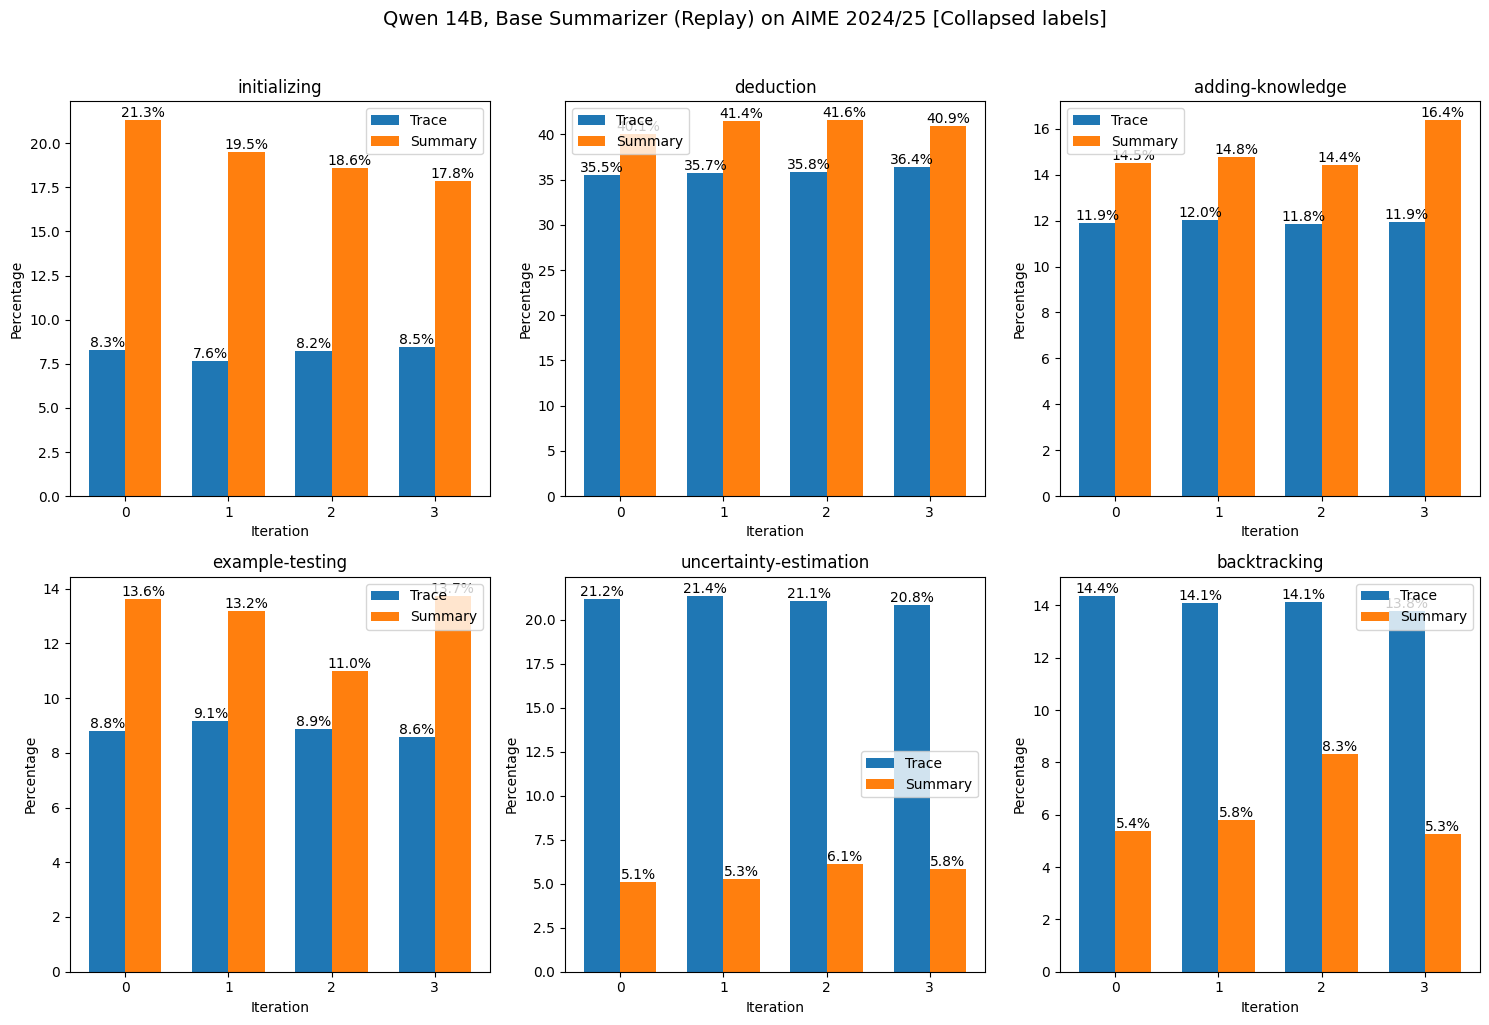

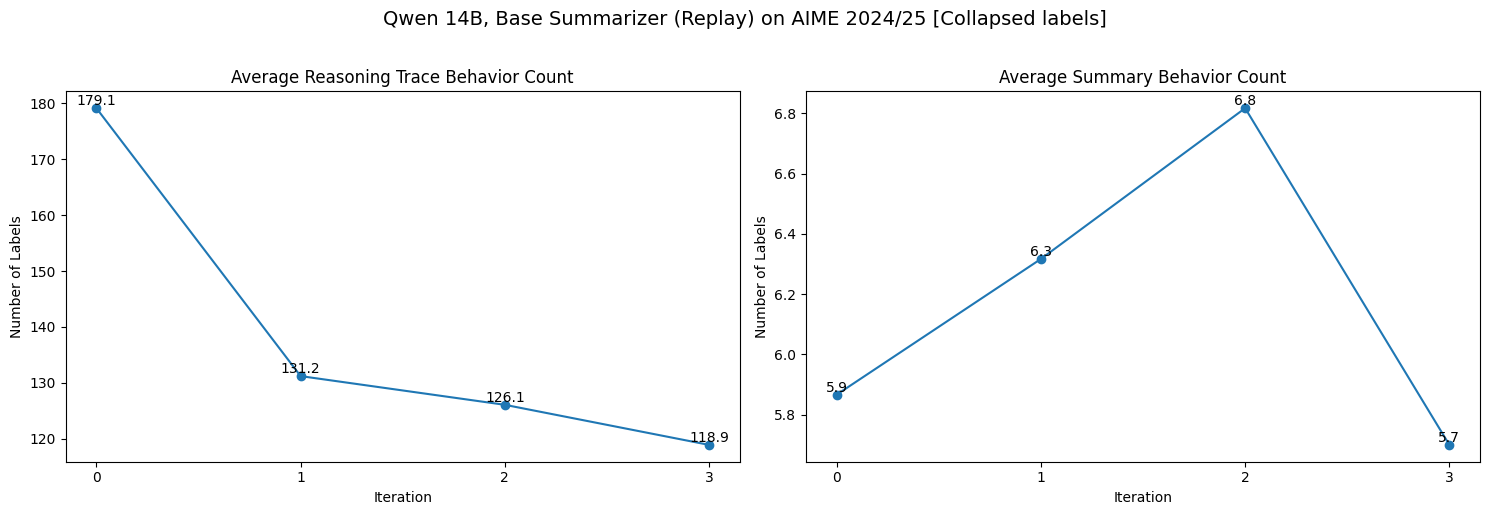

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# First plot - behavior percentages
# Set up the data structures
iterations = range(4)
percentages = {label: {'trace': [], 'summary': []} for label in LABELS}

# Calculate percentages for each iteration and text type
for iter_num in iterations:
    iter_df = df[df['iter'] == iter_num]
    
    # Calculate trace percentages
    total_trace_len = iter_df['trace_len'].sum()
    for label in LABELS:
        total_occurrences = iter_df[f'trace_{label}'].sum()
        percentage = (total_occurrences / total_trace_len * 100) if total_trace_len else 0
        percentages[label]['trace'].append(percentage)
        
    # Calculate summary percentages    
    total_sum_len = iter_df['sum_len'].sum()
    for label in LABELS:
        total_occurrences = iter_df[f'sum_{label}'].sum()
        percentage = (total_occurrences / total_sum_len * 100) if total_sum_len else 0
        percentages[label]['summary'].append(percentage)

# Create subplots for first plot
fig1, axs1 = plt.subplots(2, 3, figsize=(15, 10))
axs1 = axs1.ravel()

# Add title
plt.suptitle(f'Qwen 14B, Base Summarizer (Replay) on AIME 2024/25 [{COLLAPSE} labels]', fontsize=14, y=1.02)

# Plot a bar graph for each label
for idx, label in enumerate(LABELS):
    x = np.arange(len(iterations))
    width = 0.35
    
    trace_bars = axs1[idx].bar(x - width/2, percentages[label]['trace'], width, label='Trace')
    summary_bars = axs1[idx].bar(x + width/2, percentages[label]['summary'], width, label='Summary')
    
    # Add percentage labels over bars
    for bars in [trace_bars, summary_bars]:
        for bar in bars:
            height = bar.get_height()
            axs1[idx].text(bar.get_x() + bar.get_width()/2., height,
                         f'{height:.1f}%',
                         ha='center', va='bottom')
    
    axs1[idx].set_title(label)
    axs1[idx].set_xlabel('Iteration')
    axs1[idx].set_ylabel('Percentage')
    axs1[idx].set_xticks(x)
    axs1[idx].set_xticklabels(iterations)
    axs1[idx].legend()

plt.tight_layout()
plt.show()

# Second plot - average lengths
# Calculate average lengths for each iteration
avg_lengths = {'trace': [], 'summary': []}
for iter_num in iterations:
    iter_df = df[df['iter'] == iter_num]
    avg_lengths['trace'].append(iter_df['trace_len'].mean())
    avg_lengths['summary'].append(iter_df['sum_len'].mean())

# Create second plot with 2 subplots
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Add title
plt.suptitle(f'Qwen 14B, Base Summarizer (Replay) on AIME 2024/25 [{COLLAPSE} labels]', fontsize=14, y=1.02)

# Plot trace length
ax1.plot(iterations, avg_lengths['trace'], marker='o')
ax1.set_title('Average Reasoning Trace Behavior Count')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Number of Labels')
ax1.set_xticks(iterations)
# Add value labels
for i, v in enumerate(avg_lengths['trace']):
    ax1.text(i, v, f'{v:.1f}', ha='center', va='bottom')

# Plot summary length
ax2.plot(iterations, avg_lengths['summary'], marker='o')
ax2.set_title('Average Summary Behavior Count')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Number of Labels')
ax2.set_xticks(iterations)
# Add value labels
for i, v in enumerate(avg_lengths['summary']):
    ax2.text(i, v, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
